In [1]:
import numpy as np
import math
import os,sys,inspect
import random
import matplotlib.pyplot as plt
import pandas as pd

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

from Algorithm_2 import Algorithm_2, GetCoFromEigen
from Algorithm_3 import Algorithm_3
from func.Select_Index import Select_Columns, Select_Rows, Select_Ind
from func.Summation_Alg import GetCoFromEigen

import itertools 
from itertools import combinations, chain 

def findsubsets(r, n): 
    s = range(0, n)
    return list(itertools.combinations(s, r)) 

def Check_Best_CUR(A, k):
    
    ans = math.inf
    columns = []
    rows = []
    
    m = A.shape[0]
    n = A.shape[1]
    
    Cols = findsubsets(k, n)
    Rows = findsubsets(k, m)
    
    for col__ in Cols:
        for row__ in Rows:
            
            col = list(col__)
            row = list(row__)
            
            C  = Select_Columns(A, col)
            R  = Select_Rows(A, row)
            U = np.linalg.pinv(C) @ A @ np.linalg.pinv(R)
            
            norm = np.linalg.norm(A - C @ U @ R,'fro')
            if(norm < ans):
                ans = norm
                columns = col
                rows = row
            
    return ans, columns, rows

In [12]:
def GetSparse(m, n, dens, a, b, distr):
    A = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            if random.random() < dens:
                A[i][j] = distr(a, b)
    return A


def GetKRank(m, n, k, a, b, distr):
    Z = np.zeros((m,n))
    for i in range(k):
        Z[i][i] = distr(a, b)
    U = np.random.uniform(a,b, (m,m))
    U = U @ U.T
    V = np.random.uniform(a,b, (n,n))
    V = V @ V.T
    return U @ Z @ V

In [28]:
def GetHilbertTest(m,n):
    A = np.zeros((m,n))

    arrK2 = []
    arrE2 = []
    arrT2 = []

    arrK3 = []
    arrE3 = []
    arrT3 = []

    for i in range(m):
        for j in range(n):
            A[i][j] = 1/(i+j+1)
        
        
    for k in range(1,n):
        start = pd.Timestamp.now()
        C, U, R ,Cs, Rs = Algorithm_2(A, k)
        end = pd.Timestamp.now()
        print(k)
        arrK2.append(k)
        time = end - start
        arrT2.append(time.total_seconds())
        arrE2.append(np.linalg.norm(A - C@U@R, 'fro'))
    
    for k in range(1,n):
        start = pd.Timestamp.now()
        C, U, R ,Cs, Rs = Algorithm_3(A, k)
        end = pd.Timestamp.now()
        #print(k)
        arrK3.append(k)
        time = end - start
        arrT3.append(time.total_seconds())
        arrE3.append(np.linalg.norm(A - C@U@R, 'fro'))
    return arrK2, arrE2, arrT2, arrK3, arrE3, arrT3

def GetRankTest(m,n,rank):
    A = GetKRank(m,n,rank,-1,1,np.random.uniform)

    arrKR2 = []
    arrER2 = []
    arrTR2 = []

    arrKR3 = []
    arrER3 = []
    arrTR3 = []


        
            
    for k in range(1,n):
        start = pd.Timestamp.now()
        C, U, R ,Cs, Rs = Algorithm_2(A, k)
        end = pd.Timestamp.now()
        #print(k)
        arrKR2.append(k)
        time = end - start
        arrTR2.append(time.total_seconds())
        arrER2.append(np.linalg.norm(A - C@U@R, 'fro'))
    
    for k in range(1,n):
        start = pd.Timestamp.now()
        C, U, R ,Cs, Rs = Algorithm_3(A, k)
        end = pd.Timestamp.now()
        #print(k)
        arrKR3.append(k)
        time = end - start
        arrTR3.append(time.total_seconds())
        arrER3.append(np.linalg.norm(A - C@U@R, 'fro'))
    return arrKR2, arrER2, arrTR2, arrKR3, arrER3, arrTR3

def GetSparseTest(m,n,dens):
    A = GetSparse(m,n,dens,-1,1,np.random.uniform)

    arrKS2 = []
    arrES2 = []
    arrTS2 = []

    arrKS3 = []
    arrES3 = []
    arrTS3 = []


        
            
    for k in range(1,n):
        start = pd.Timestamp.now()
        C, U, R ,Cs, Rs = Algorithm_2(A, k)
        end = pd.Timestamp.now()
        print(k)
        arrKS2.append(k)
        time = end - start
        arrTS2.append(time.total_seconds())
        arrES2.append(np.linalg.norm(A - C@U@R, 'fro'))
    
    for k in range(1,n):
        start = pd.Timestamp.now()
        C, U, R ,Cs, Rs = Algorithm_3(A, k)
        end = pd.Timestamp.now()
        #print(k)
        arrKS3.append(k)
        time = end - start
        arrTS3.append(time.total_seconds())
        arrES3.append(np.linalg.norm(A - C@U@R, 'fro'))
    return KS2,ES2,ET2, KS3, ES3, TS3

Hilbert matrix

In [20]:
m = 20
n = 15

A = np.zeros((m,n))

arrK2 = []
arrE2 = []
arrT2 = []

arrK3 = []
arrE3 = []
arrT3 = []

for i in range(m):
    for j in range(n):
        A[i][j] = 1/(i+j+1)
        
        
for k in range(1,n):
    start = pd.Timestamp.now()
    C, U, R ,Cs, Rs = Algorithm_2(A, k)
    end = pd.Timestamp.now()
    print(k)
    arrK2.append(k)
    time = end - start
    arrT2.append(time.total_seconds())
    arrE2.append(np.linalg.norm(A - C@U@R, 'fro'))
    
for k in range(1,n):
    start = pd.Timestamp.now()
    C, U, R ,Cs, Rs = Algorithm_3(A, k)
    end = pd.Timestamp.now()
    print(k)
    arrK3.append(k)
    time = end - start
    arrT3.append(time.total_seconds())
    arrE3.append(np.linalg.norm(A - C@U@R, 'fro'))




1
2
3


/Users/vladimirsevcov/Downloads/Low-Rank-approx_project-master/Algorithm_2.py:55: RuntimeWarning: overflow encountered in cdouble_scalars
  ratio = up/down
/Users/vladimirsevcov/Downloads/Low-Rank-approx_project-master/Algorithm_2.py:55: RuntimeWarning: invalid value encountered in cdouble_scalars
  ratio = up/down


4
5
6
7
8
9
10
11
12
13
14
1


/Users/vladimirsevcov/Downloads/Low-Rank-approx_project-master/func/Summation_Alg.py:18: RuntimeWarning: overflow encountered in multiply
  S[i, j] = S[i-1, j] + eigen[i]*S[i-1,j-1]
/Users/vladimirsevcov/Downloads/Low-Rank-approx_project-master/func/Summation_Alg.py:18: RuntimeWarning: invalid value encountered in multiply
  S[i, j] = S[i-1, j] + eigen[i]*S[i-1,j-1]


2
3
4
5
6
7


/Users/vladimirsevcov/Downloads/Low-Rank-approx_project-master/Algorithm_3.py:78: RuntimeWarning: overflow encountered in cdouble_scalars
  r = up/down
/Users/vladimirsevcov/Downloads/Low-Rank-approx_project-master/Algorithm_3.py:78: RuntimeWarning: invalid value encountered in cdouble_scalars
  r = up/down


8


/Users/vladimirsevcov/Downloads/Low-Rank-approx_project-master/func/Summation_Alg.py:18: RuntimeWarning: overflow encountered in cdouble_scalars
  S[i, j] = S[i-1, j] + eigen[i]*S[i-1,j-1]


9
10
11
12


/Users/vladimirsevcov/Downloads/Low-Rank-approx_project-master/Algorithm_3.py:98: RuntimeWarning: divide by zero encountered in double_scalars
  B = B - 1/B[i_t][j_t] * np.outer(B[:, j_t], B[i_t, :])
/Users/vladimirsevcov/Downloads/Low-Rank-approx_project-master/Algorithm_3.py:98: RuntimeWarning: invalid value encountered in multiply
  B = B - 1/B[i_t][j_t] * np.outer(B[:, j_t], B[i_t, :])


13
14


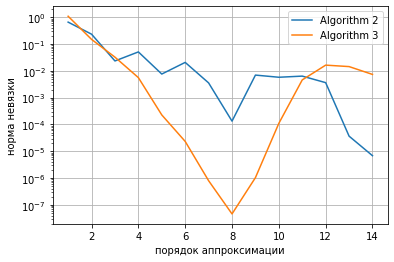

In [23]:
fig = plt.figure()
plt.plot(arrK2,arrE2, label = "Algorithm 2")
plt.plot(arrK3,arrE3, label = "Algorithm 3")
plt.legend()

plt.yscale('log')
plt.ylabel("норма невязки")
plt.xlabel("порядок аппроксимации")
plt.grid()
plt.show()

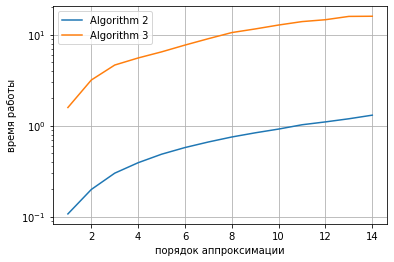

In [24]:
fig = plt.figure()
plt.plot(arrK2,arrT2, label = "Algorithm 2")
plt.plot(arrK3,arrT3, label = "Algorithm 3")
plt.legend()

plt.yscale('log')
plt.ylabel("время работы")
plt.xlabel("порядок аппроксимации")
plt.grid()
plt.show()

Rank test

In [14]:
m = 20
n = 15
rank = 10
A = GetKRank(m,n,rank,-1,1,np.random.uniform)

arrKR2 = []
arrER2 = []
arrTR2 = []

arrKR3 = []
arrER3 = []
arrTR3 = []


        
            
for k in range(1,n):
    start = pd.Timestamp.now()
    C, U, R ,Cs, Rs = Algorithm_2(A, k)
    end = pd.Timestamp.now()
    print(k)
    arrKR2.append(k)
    time = end - start
    arrTR2.append(time.total_seconds())
    arrER2.append(np.linalg.norm(A - C@U@R, 'fro'))
    
for k in range(1,n):
    start = pd.Timestamp.now()
    C, U, R ,Cs, Rs = Algorithm_3(A, k)
    end = pd.Timestamp.now()
    print(k)
    arrKR3.append(k)
    time = end - start
    arrTR3.append(time.total_seconds())
    arrER3.append(np.linalg.norm(A - C@U@R, 'fro'))

1
2
3
4
5
6
7
8
9
10
11
12


/Users/vladimirsevcov/Downloads/Low-Rank-approx_project-master/Algorithm_2.py:55: RuntimeWarning: overflow encountered in cdouble_scalars
  ratio = up/down
/Users/vladimirsevcov/Downloads/Low-Rank-approx_project-master/Algorithm_2.py:55: RuntimeWarning: invalid value encountered in cdouble_scalars
  ratio = up/down


13
14
1


/Users/vladimirsevcov/Downloads/Low-Rank-approx_project-master/func/Summation_Alg.py:18: RuntimeWarning: overflow encountered in multiply
  S[i, j] = S[i-1, j] + eigen[i]*S[i-1,j-1]
/Users/vladimirsevcov/Downloads/Low-Rank-approx_project-master/func/Summation_Alg.py:18: RuntimeWarning: invalid value encountered in multiply
  S[i, j] = S[i-1, j] + eigen[i]*S[i-1,j-1]


2
3
4
5


/Users/vladimirsevcov/Downloads/Low-Rank-approx_project-master/func/Summation_Alg.py:18: RuntimeWarning: overflow encountered in cdouble_scalars
  S[i, j] = S[i-1, j] + eigen[i]*S[i-1,j-1]


6
7
8
9
10


/Users/vladimirsevcov/Downloads/Low-Rank-approx_project-master/Algorithm_3.py:78: RuntimeWarning: overflow encountered in cdouble_scalars
  r = up/down
/Users/vladimirsevcov/Downloads/Low-Rank-approx_project-master/Algorithm_3.py:78: RuntimeWarning: invalid value encountered in cdouble_scalars
  r = up/down


11
12
13
14


/Users/vladimirsevcov/Downloads/Low-Rank-approx_project-master/Algorithm_3.py:98: RuntimeWarning: divide by zero encountered in double_scalars
  B = B - 1/B[i_t][j_t] * np.outer(B[:, j_t], B[i_t, :])
/Users/vladimirsevcov/Downloads/Low-Rank-approx_project-master/Algorithm_3.py:98: RuntimeWarning: invalid value encountered in multiply
  B = B - 1/B[i_t][j_t] * np.outer(B[:, j_t], B[i_t, :])


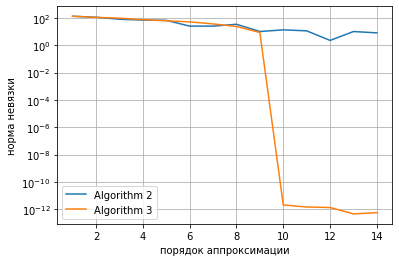

In [15]:
fig = plt.figure()
plt.plot(arrKR2,arrER2, label = "Algorithm 2")
plt.plot(arrKR3,arrER3, label = "Algorithm 3")
plt.legend()

plt.yscale('log')
plt.ylabel("норма невязки")
plt.xlabel("порядок аппроксимации")
plt.grid()
plt.show()

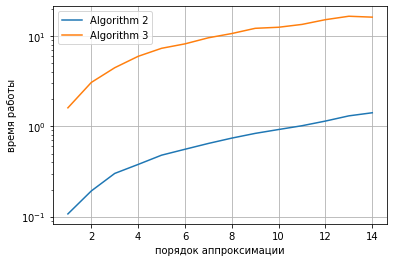

In [17]:
fig = plt.figure()
plt.plot(arrKR2,arrTR2, label = "Algorithm 2")
plt.plot(arrKR3,arrTR3, label = "Algorithm 3")
plt.legend()

plt.yscale('log')
plt.ylabel("время работы")
plt.xlabel("порядок аппроксимации")
plt.grid()
plt.show()

In [18]:
np.linalg.norm(A,'fro')

132.2427565003099

Sparse test

In [6]:
m = 20
n = 15
dens = 0.2

A = GetSparse(m,n,dens,-1,1,np.random.uniform)

arrKS2 = []
arrES2 = []
arrTS2 = []

arrKS3 = []
arrES3 = []
arrTS3 = []


        
            
for k in range(1,n):
    start = pd.Timestamp.now()
    C, U, R ,Cs, Rs = Algorithm_2(A, k)
    end = pd.Timestamp.now()
    print(k)
    arrKS2.append(k)
    time = end - start
    arrTS2.append(time.total_seconds())
    arrES2.append(np.linalg.norm(A - C@U@R, 'fro'))
    
for k in range(1,n):
    start = pd.Timestamp.now()
    C, U, R ,Cs, Rs = Algorithm_3(A, k)
    end = pd.Timestamp.now()
    print(k)
    arrKS3.append(k)
    time = end - start
    arrTS3.append(time.total_seconds())
    arrES3.append(np.linalg.norm(A - C@U@R, 'fro'))

1
2
3
4
5
6
7
8
9
10
11
12


/Users/vladimirsevcov/Downloads/Low-Rank-approx_project-master/Algorithm_2.py:55: RuntimeWarning: overflow encountered in cdouble_scalars
  ratio = up/down
/Users/vladimirsevcov/Downloads/Low-Rank-approx_project-master/Algorithm_2.py:55: RuntimeWarning: invalid value encountered in cdouble_scalars
  ratio = up/down


13
14
1


/Users/vladimirsevcov/Downloads/Low-Rank-approx_project-master/func/Summation_Alg.py:18: RuntimeWarning: overflow encountered in multiply
  S[i, j] = S[i-1, j] + eigen[i]*S[i-1,j-1]
/Users/vladimirsevcov/Downloads/Low-Rank-approx_project-master/func/Summation_Alg.py:18: RuntimeWarning: invalid value encountered in multiply
  S[i, j] = S[i-1, j] + eigen[i]*S[i-1,j-1]


2
3
4
5
6
7
8
9
10
11


/Users/vladimirsevcov/Downloads/Low-Rank-approx_project-master/Algorithm_3.py:78: RuntimeWarning: overflow encountered in cdouble_scalars
  r = up/down
/Users/vladimirsevcov/Downloads/Low-Rank-approx_project-master/Algorithm_3.py:78: RuntimeWarning: invalid value encountered in cdouble_scalars
  r = up/down


12
13
14


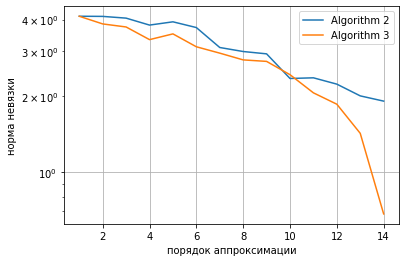

In [7]:
fig = plt.figure()
plt.plot(arrKS2,arrES2, label = "Algorithm 2")
plt.plot(arrKS3,arrES3, label = "Algorithm 3")
plt.legend()

plt.yscale('log')
plt.ylabel("норма невязки")
plt.xlabel("порядок аппроксимации")
plt.grid()
plt.show()

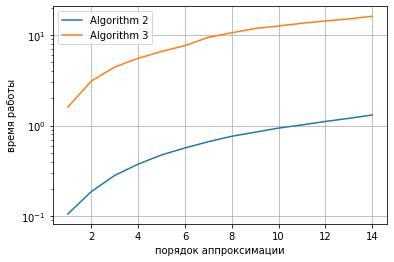

In [8]:
fig = plt.figure()
plt.plot(arrK2,arrT2, label = "Algorithm 2")
plt.plot(arrK3,arrT3, label = "Algorithm 3")
plt.legend()

plt.yscale('log')
plt.ylabel("время работы")
plt.xlabel("порядок аппроксимации")
plt.grid()
plt.show()

Dim Test

In [9]:
np.linalg.norm(A,'fro')

4.132366289176371

In [10]:
A

array([[ 0.        , -0.74847064,  0.        ,  0.        ,  0.        ,
         0.        , -0.55287896,  0.87197069,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.21362552,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.39933198,
        -0.01766012,  0.        ,  0.5609021 , -0.21140425,  0.        ,
        -0.04916866,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.50443106,  0.30814589,  0.        ,  0.        ,
         0.98365575,  0.        , -0.23038412,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.03384638],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.21631053,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.69210087,
         0.        ,  0.        ,  0.        , 